In [2]:
setwd(fs::path_abs("~/Local_Workspace/TesiMag"))
library(arrow, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)

source("src/paths/paths.R")
source("notebooks/integrazioni_regionali/nb_tools/state_avail.R")
source("notebooks/integrazioni_regionali/nb_tools/pairing_procedure.R")
path.er <- file.path(path.ds, "ARPA", "EMILIA-ROMAGNA")


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

terra 1.7.55

Caricamento del pacchetto richiesto: abind



In [117]:
er <- open_dataset(file.path(path.er, "dataset"), format = "feather") |>
    mutate(
        across(c(name, network, variable), ~ cast(., utf8()))
    )


In [118]:
er |> nrow()


[1] 6572200

In [119]:
meta <- er |>
    select(lon, lat, name, network) |>
    distinct() |>
    collect() |>
    arrange(lon)


In [120]:
metag <- meta |>
    mutate(across(c(lon, lat), ~ . / 100000L)) |>
    st_md_to_sf()


Reading layer `geoBoundaries-ITA-ADM1' from data source 
  `/Users/davidenicoli/Local_Workspace/Datasets/geoBoundaries/ITA-ADM1/geoBoundaries-ITA-ADM1.geojson' 
  using driver `GeoJSON'
Simple feature collection with 20 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 6.626621 ymin: 35.49285 xmax: 18.52038 ymax: 47.09178
Geodetic CRS:  WGS 84


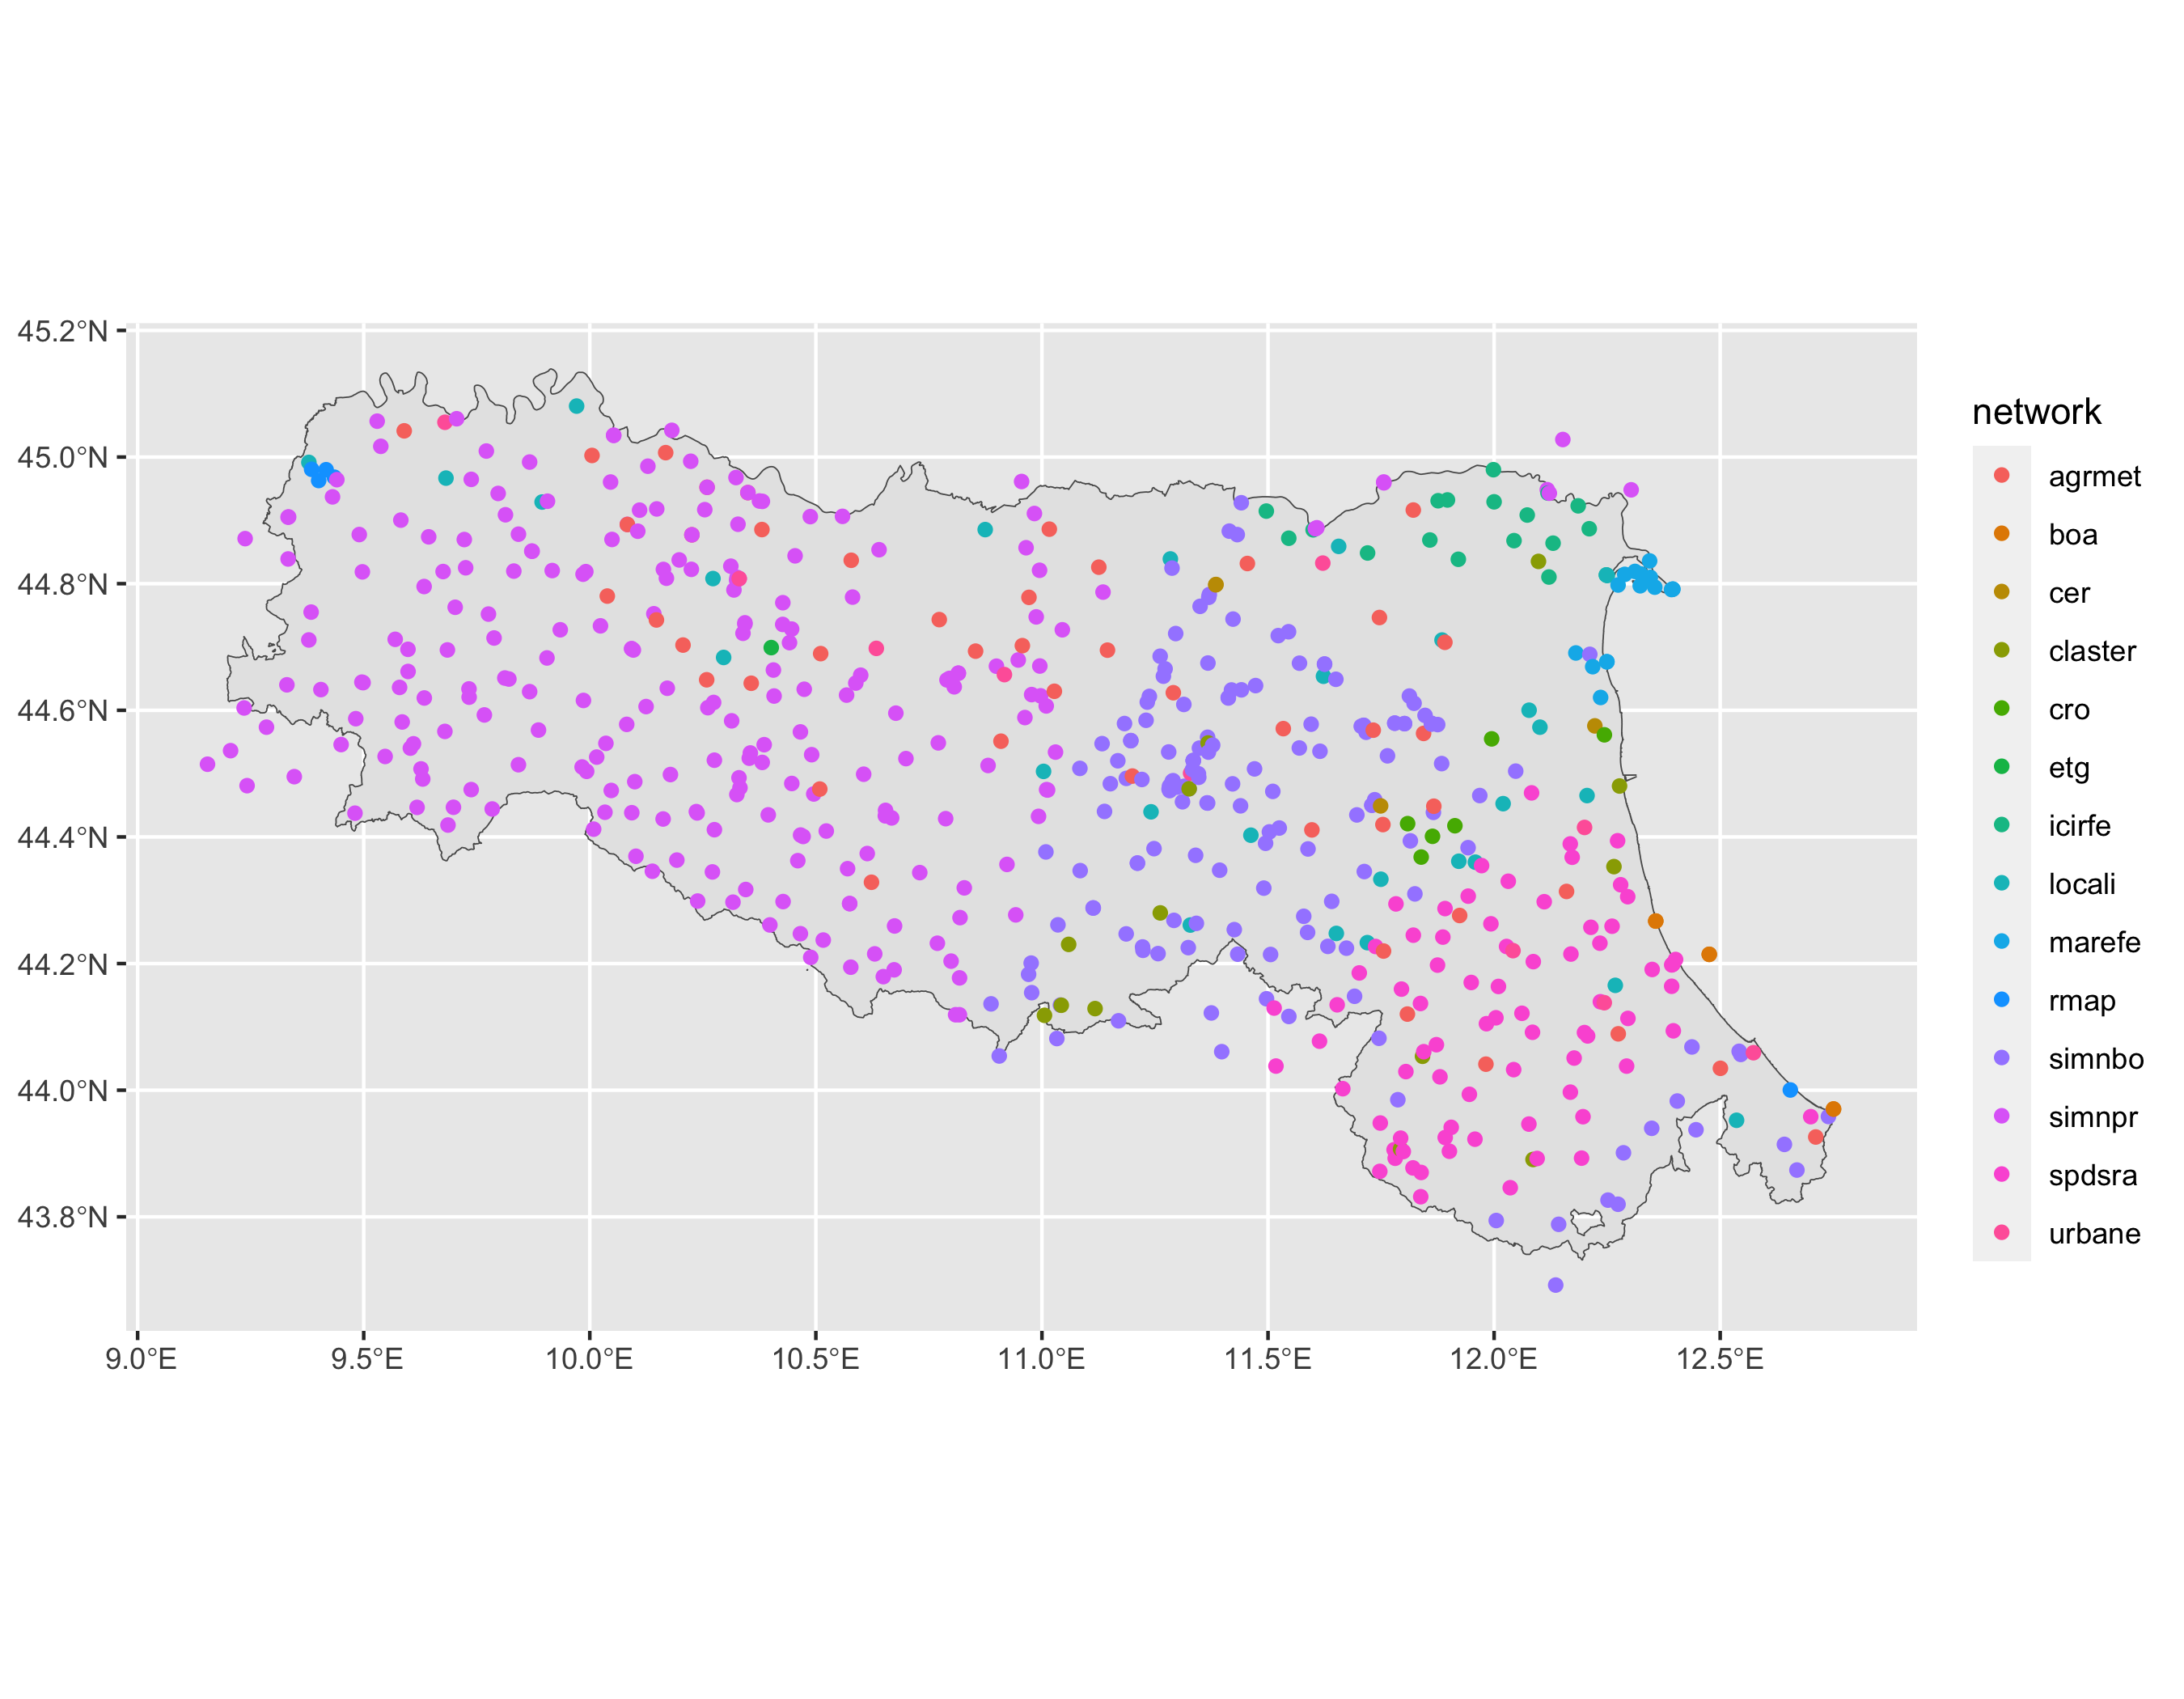

In [126]:
erb <- load.italian_boundaries("state") |> filter(shapeName == "Emilia-Romagna")
ggplot() +
    geom_sf(data = erb) +
    geom_sf(data = metag, aes(color = network))


In [122]:
scia <- open_db_state_data("SCIA", "Emilia-Romagna")
dpc <- open_db_state_data("BRUN", "Emilia-Romagna")


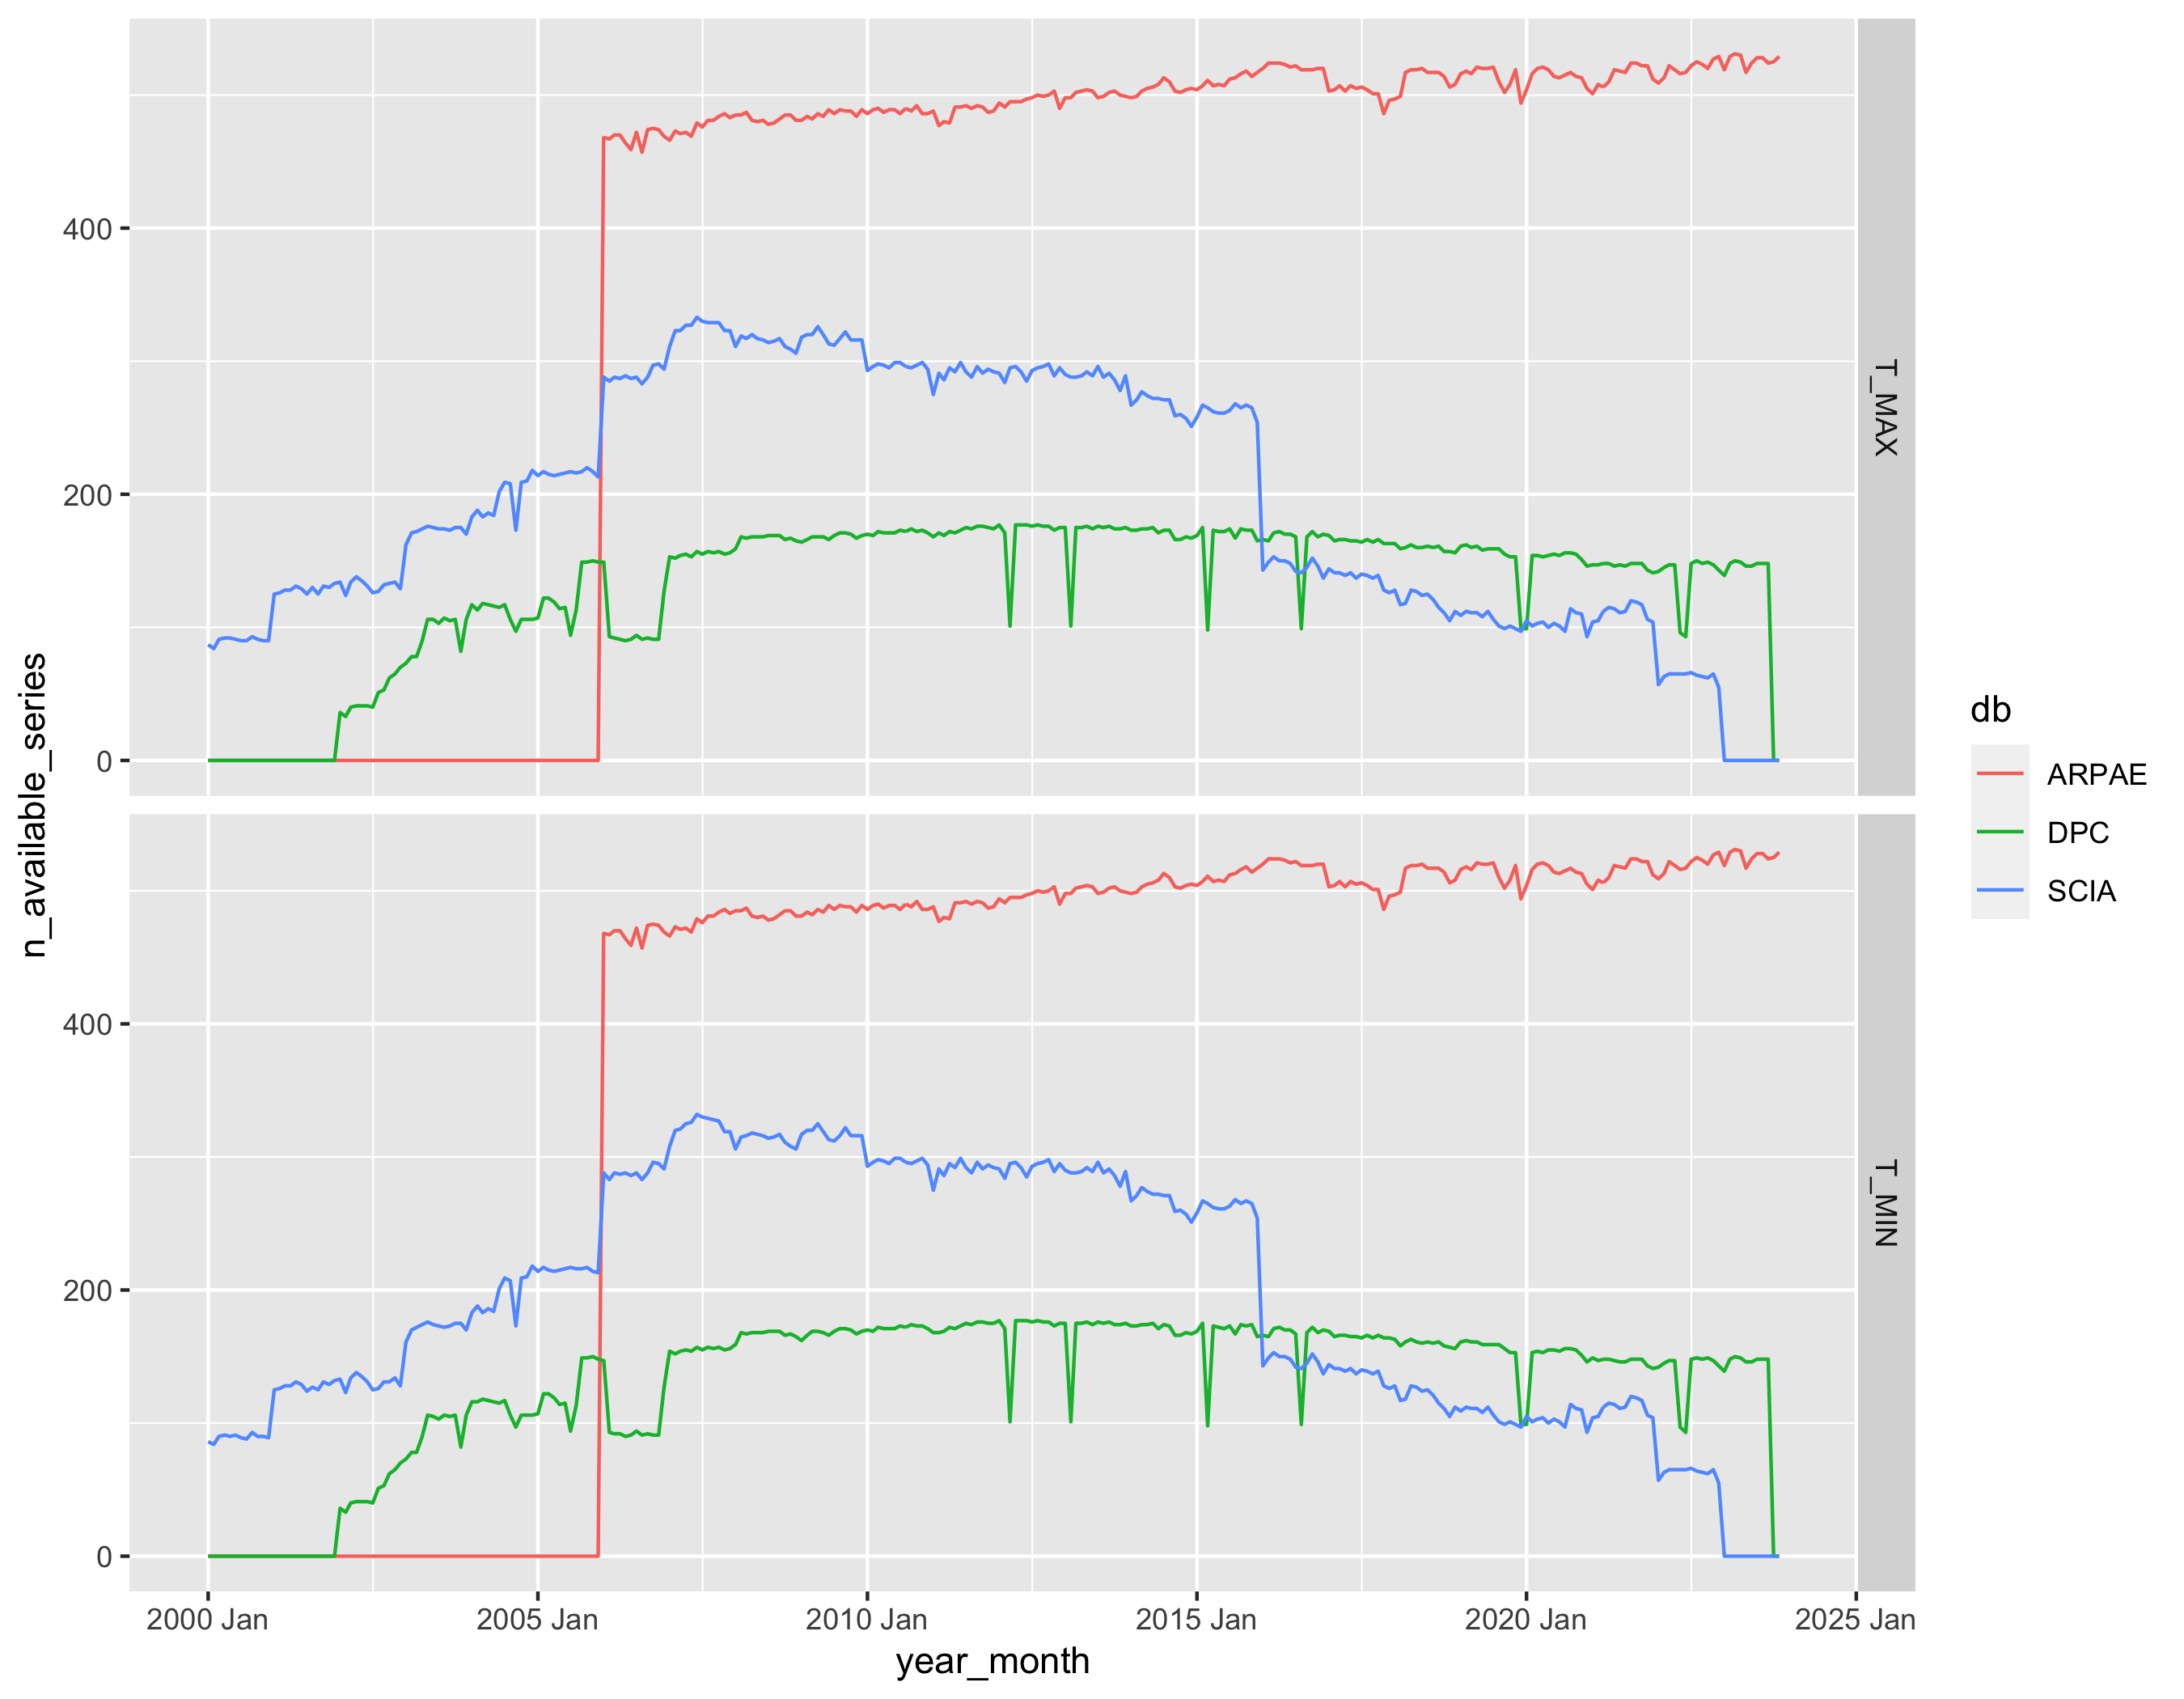

In [123]:
library(stringr)
plot_state_avail(bind_rows(
    SCIA = scia,
    DPC = dpc,
    ARPAE = er |> mutate(identifier = str_c(network, name)) |> select(value, date, variable, identifier) |> collect(),
    .id = "db"
))
